In [56]:
# import quandl
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

# df = quandl.get("WIKI/AMZN")
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'],)
df=df.iloc[::-1]
df.index = df['Date']
del df['Date']
df.info()
df = df[['Close']]
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2013-04-28 to 2017-11-07
Data columns (total 6 columns):
Open          1655 non-null float64
High          1655 non-null float64
Low           1655 non-null float64
Close         1655 non-null float64
Volume        1655 non-null object
Market Cap    1655 non-null object
dtypes: float64(4), object(2)
memory usage: 90.5+ KB
              Close
Date               
2017-11-03  7207.76
2017-11-04  7379.95
2017-11-05  7407.41
2017-11-06  7022.76
2017-11-07  7144.38


In [57]:
df.head()

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [58]:
df = df[['Close']]

forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9036278554322356
[5691.10004813 5703.08055399 5756.54220957 6502.08536461 6742.77697197
 6964.57855404 6780.00426102 6836.96273426 6692.66793539 6674.85940009
 6816.45047396 7180.46799077 7204.68135018 7176.82697445 7082.97767572
 6597.89336189 6867.25647076 7052.34747566 6903.42630292 6870.00826198
 7351.58374159 7323.56113408 7729.56449594 8088.75135743 8462.69454911
 8618.02054596 8824.93361571 8857.93107721 8395.71426856 8541.85961698]


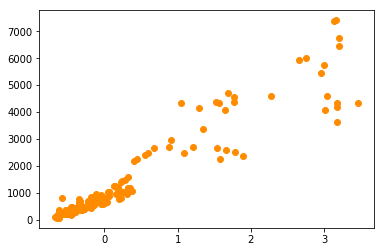

In [63]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, y_test, color='darkorange', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [64]:
clf.score(X_test,y_test)

0.9036278554322356

In [62]:
# dict_new = {
#     'Date': X_train,
#     'Close': y_train
# }
# df1=pd.DataFrame(dict_new).set_index('Date')
# df1

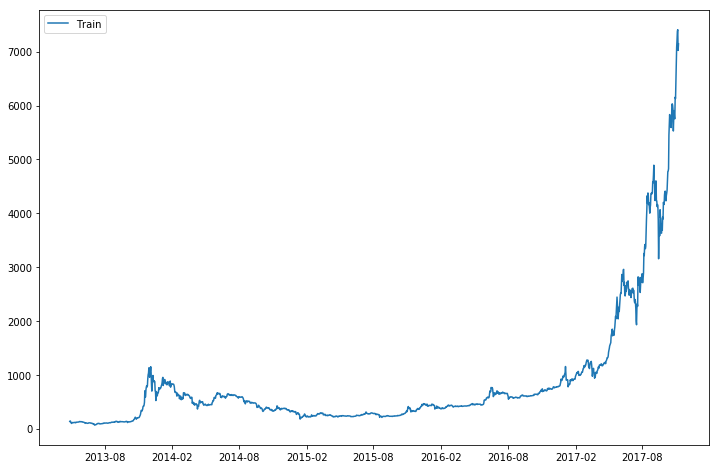

In [61]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [7]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.avg_forecast))
print(rms)

3629.001658095474
